In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy
import numpy
import pandas

In [3]:
import matplotlib.pyplot as pyplt

In [4]:
import seaborn as sns

#### Form data points

In [5]:
tweetsDF = pandas.io.json.read_json("new_gruber_tweets.json")

In [6]:
createdDF = tweetsDF.ix[0:, ["created_at"]]
createdTextDF = tweetsDF.ix[0:, ["created_at", "text"]]
createdTextVals = createdTextDF.values

In [7]:
tweetTimes = []
for i,row in createdDF.iterrows():
    tweetTimes.append(row["created_at"])
tweetTimes.sort()

In [111]:
timeUntilNext = []
#for i in xrange(1, len(tweetTimes)-1)
for i in xrange(1, len(tweetTimes)):
    timeDiff = (tweetTimes[i]-tweetTimes[i-1]).seconds
    timeUntilNext.append(timeDiff)

In [112]:
len(tweetTimes), len(timeUntilNext)

(3234, 3233)

#### Create initial histogram

In [113]:
timeToNextSeries = pandas.Series(timeUntilNext)

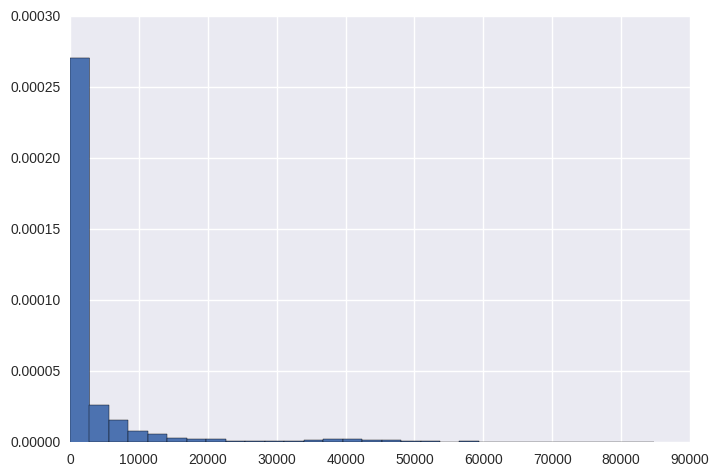

In [114]:
timeToNextSeries.hist(bins=30, normed=True)

In [115]:
from scipy.optimize import curve_fit

In [116]:
def fitFunc(t, b):  # beta = 1/b
    return b*numpy.exp(-b*t)

In [130]:
count,division = np.histogram(timeUntilNext, bins=100, normed=True)

In [135]:
len(count), len(division)

(100, 101)

In [131]:
fitParams, fitCov = curve_fit(fitFunc, division[0:len(division)-1], count, p0=1e-4)

In [132]:
fitParams

array([ 0.00068878])

In [133]:
1/fitParams[0]

1451.8449683531308

In [134]:
fitCov

array([[  1.03856203e-09]])

#### Evaluate exponential¶

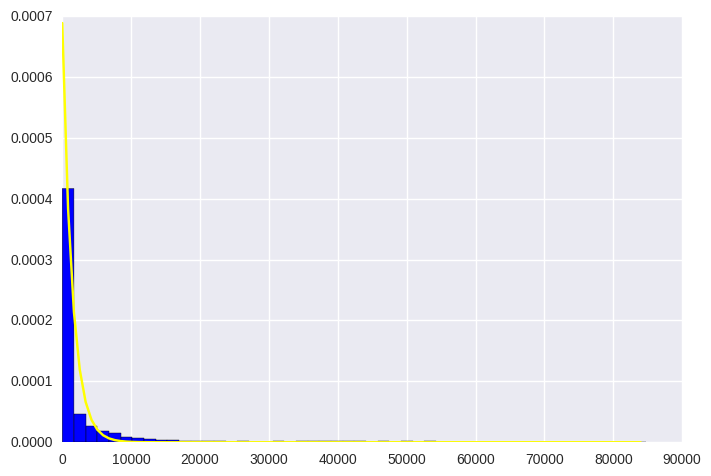

In [18]:
t = division[0:len(division)-1]
timeToNextSeries.hist(bins=50, normed=True, color="blue")
pyplt.plot(t, fitFunc(t, fitParams[0]), color="yellow")

In [19]:
exp_diffs = []
for t in timeUntilNext:
    exp_diffs.append(t-1/fitParams[0])

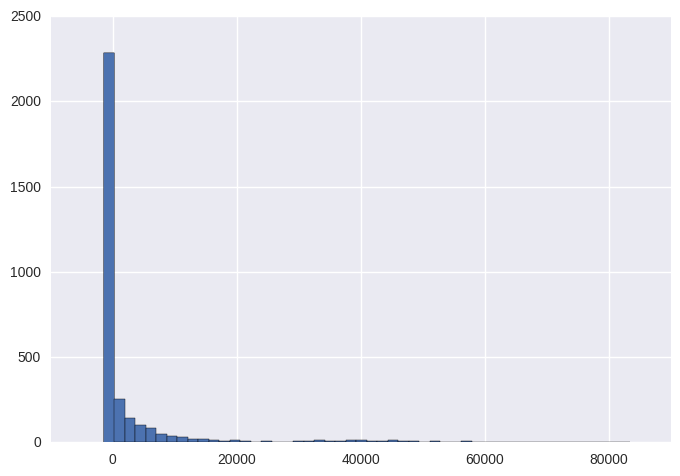

In [20]:
pandas.Series(exp_diffs).hist(bins=50)

In [21]:
pandas.Series(exp_diffs).describe()

count     3232.000000
mean      2843.046022
std      11064.424336
min      -1450.488322
25%      -1368.488322
50%      -1115.488322
75%       1032.261678
max      83356.511678
dtype: float64

#### Evaluate absolute difference of values

In [22]:
import math
exp_diffs = []
abs_diffs = []
for t in timeUntilNext:
    exp_diffs.append(t-1/fitParams[0])
    abs_diffs.append(math.fabs(t-1/fitParams[0]))

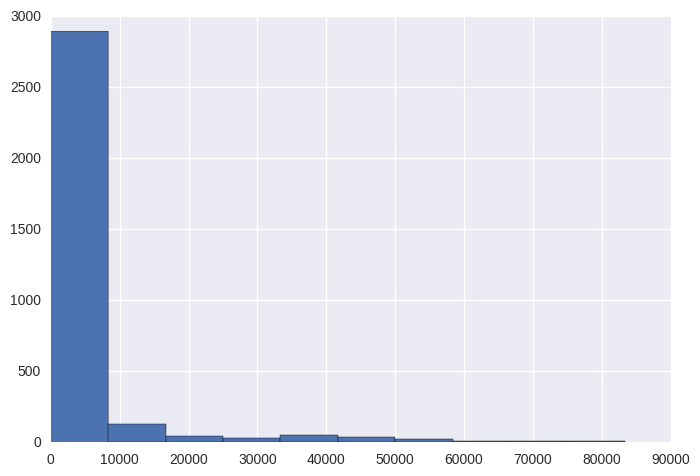

In [23]:
pandas.Series(abs_diffs).hist()

In [24]:
pandas.Series(abs_diffs).describe()

count     3232.000000
mean      4446.834435
std      10522.663235
min          0.488322
25%       1110.505839
50%       1363.488322
75%       1437.488322
max      83356.511678
dtype: float64

#### Observe effect of adding offset
Note that much of the histogram occurs *before* zero. Perhaps by adding an offset, we can improve performance. 

#### Fit more generalized exponential

In [25]:
def fitFunc_gen(t, a, b, c):
    return a*(b)*numpy.exp(-b*t)+c

In [26]:
fitParams_gen, fitCov_gen = curve_fit(fitFunc_gen, division[0:len(division)-1], count, p0=[0, 3e-4, 0])

In [27]:
fitParams_gen

array([  3.34149579e-01,   2.17218731e-03,   3.18496893e-06])

In [28]:
fitCov_gen

array([[  1.10186662e-04,  -6.83152395e-07,  -1.07612174e-09],
       [ -6.83152395e-07,   4.65228421e-09,   5.59704090e-12],
       [ -1.07612174e-09,   5.59704090e-12,   4.82402257e-13]])

In [29]:
(1/fitParams_gen[1])*fitParams_gen[0]+fitParams_gen[1]

153.83309530367035

#### Evaluate adjusted exponential

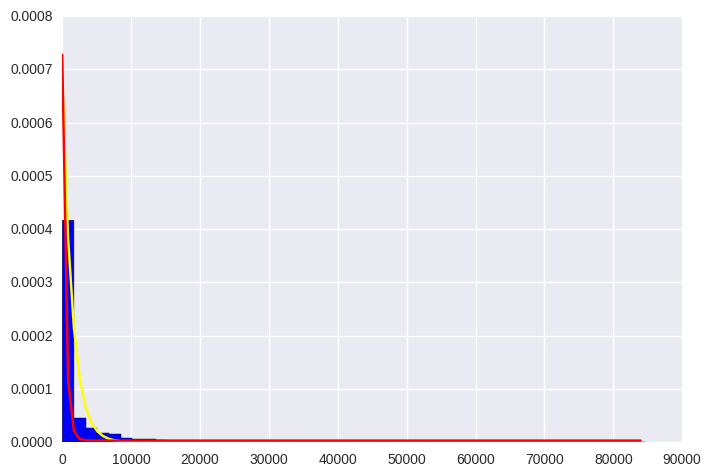

In [30]:
t = division[0:len(division)-1]
timeToNextSeries.hist(bins=50, normed=True, color="blue")
pyplt.plot(t, fitFunc(t, fitParams[0]), color="yellow")
pyplt.plot(t, fitFunc_gen(t, fitParams_gen[0], fitParams_gen[1], fitParams_gen[2]), color="red")

In [31]:
exp_gen_diffs = []
exp_gen_abs = []
for t in timeUntilNext:
    exp_gen_diffs.append((t-1/fitParams_gen[1])*fitParams_gen[0]+fitParams_gen[1])
    exp_gen_abs.append(math.fabs((t-1/fitParams_gen[1])*fitParams_gen[0]+fitParams_gen[1]))

In [32]:
pandas.Series(exp_gen_diffs).describe()

count     3232.000000
mean      1281.188091
std       3697.172731
min       -153.494601
25%       -126.094336
50%        -41.554492
75%        676.115265
max      28184.728725
dtype: float64

In [33]:
pandas.Series(exp_gen_abs).describe()

count     3232.000000
mean      1400.959394
std       3653.456237
min          0.119945
25%        107.716109
50%        139.126169
75%        676.115265
max      28184.728725
dtype: float64

### Depection of variance in data

In [136]:
tweetsDF = pandas.io.json.read_json("new_gruber_tweets.json")

#### Obtaining time-to-tweet vs. delta-t data points

In [148]:
step_size = 10
data_points = []
for v in timeUntilNext:
    bin_left_edges = np.arange(0, v, step_size)
    
    for l_edge in bin_left_edges:
        tempNewPoint = [l_edge, v-l_edge]
        data_points.append(tempNewPoint)

In [149]:
data_points.sort()

In [150]:
deltat_100 = [v[1] for v in data_points if v[0]==100]
deltat_150 = [v[1] for v in data_points if v[0]==150]
deltat_10 = [v[1] for v in data_points if v[0]==10]

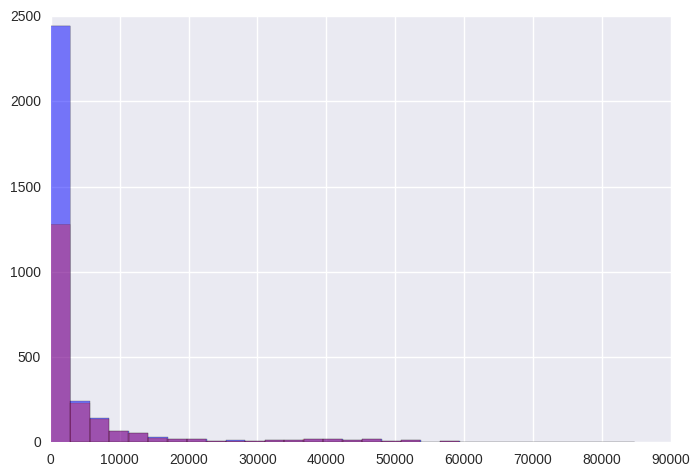

In [151]:
pandas.Series(deltat_10).hist(bins=30, alpha=0.5, color="blue")
#pandas.Series(deltat_100).hist(bins=30)
d_150 = pandas.Series(deltat_150)
pandas.Series(deltat_150).hist(bins=30, alpha=0.3, color="red")

In [152]:
scipy.std(deltat_150)

13378.446251553467

In [153]:
deltatToStd = []
deltaToDist = []
for i in np.arange(0, 100, 10):
    tempDeltas = [v[1] for v in data_points if v[0] == i]
    tempStd = scipy.std(tempDeltas)
    deltatToStd.append([i, tempStd])
    deltaToDist.append([i, tempDeltas])

In [154]:
xVals = [v[0] for v in deltatToStd]
yVals = [v[1] for v in deltatToStd]

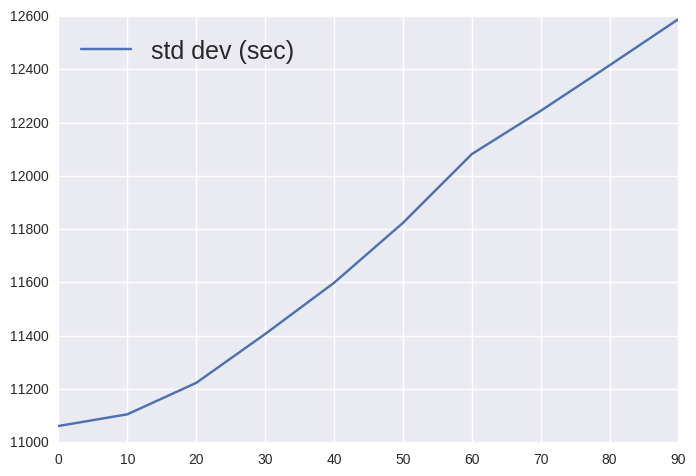

In [155]:
p1 = pyplt.plot(xVals, yVals, label="std dev (sec)")
pyplt.legend(loc=2, prop={'size':18})

#### Obtain bounds on bootstrapped 95% confidence interval

In [156]:
deltaToBounds = []
for v in deltaToDist:
    topBound = numpy.percentile(v[1], 95)
    bottomBound = numpy.percentile(v[1], 5)
    deltaToBounds.append([v[0], (topBound, bottomBound)])

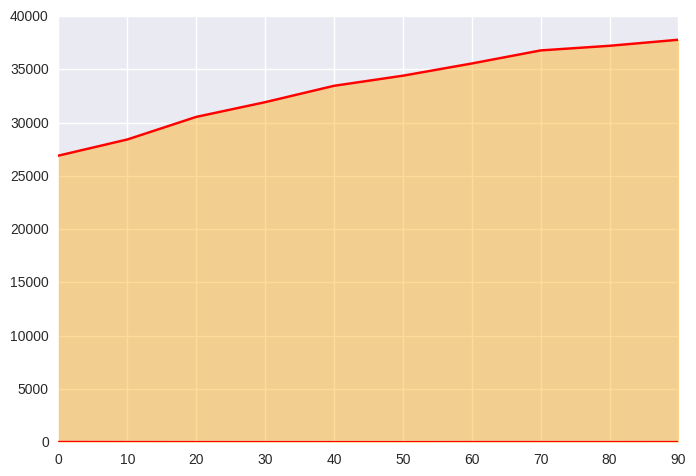

In [157]:
p1 = pyplt.plot(xVals, [e[1][0] for e in deltaToBounds], color="red")
p2 = pyplt.plot(xVals, [e[1][1] for e in deltaToBounds], color="red")
pyplt.fill_between(xVals, [e[1][0] for e in deltaToBounds], [e[1][1] for e in deltaToBounds], alpha=0.4, color="orange")

### Impact of unmeasured features

#### One variable plus gaussian noise

In [45]:
dataPoints_1 = []
x = np.arange(0, 100, 10)
for j in xrange(100):
    points = [(i, i*2 + 3 + numpy.random.normal(scale=50.0)) for i in x]
    dataPoints_1.extend(points)

In [46]:
pointToVals = []
pointToBounds = []
for i in np.arange(0, 100, 10):
    valsForDataPoint = [v for v in dataPoints_1 if v[0]==i]
    pointToVals.append(valsForDataPoint)
    upperBound = numpy.percentile(valsForDataPoint, 95)
    lowerBound = numpy.percentile(valsForDataPoint, 5)
    pointToBounds.append([i, (upperBound, lowerBound)])

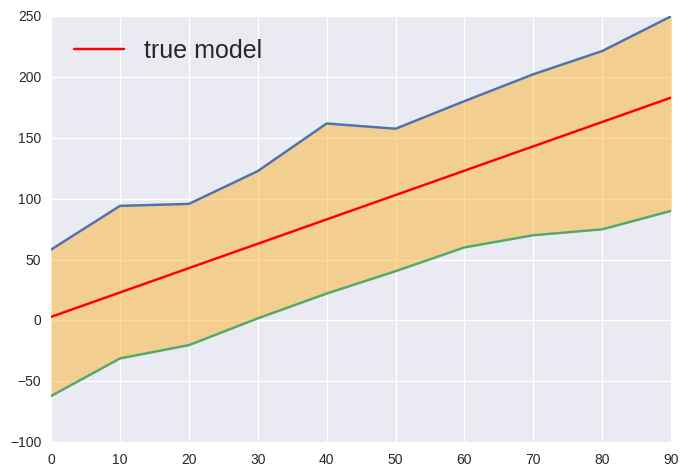

In [47]:
pyplt.plot(x, [v[1][0] for v in pointToBounds])
pyplt.plot(x, [v[1][1] for v in pointToBounds])
pyplt.plot(x, [[i*2+3] for i in x], color="red", label="true model")
pyplt.fill_between(x, [v[1][0] for v in pointToBounds], [v[1][1] for v in pointToBounds], color="orange", alpha=0.4)
pyplt.legend(loc=2, prop={'size':18})

#### Two variables plus gaussian noise

In [48]:
dataPoints_2 = []
x = np.arange(0, 100, 10)
y = np.arange(50, 150, 10)
for j in xrange(100):
    yVal = random.choice(y)
    points = [(i, i*2 + yVal*2 + 3 + numpy.random.normal(scale=50.0)) for i in x]
    dataPoints_2.extend(points)

In [49]:
avgYAtX = {}
for i in x:
    lineVals = [(i*2 + yVal*2 + 3 ) for yVal in np.arange(50, 150, 10)]
    avgY = reduce(lambda x,y: x+y, lineVals)/len(lineVals)
    avgYAtX[i] = avgY

In [50]:
pointToVals = []
pointToBounds = []
for i in np.arange(0, 100, 10):
    valsForDataPoint = [v for v in dataPoints_2 if v[0]==i]
    pointToVals.append(valsForDataPoint)
    upperBound = numpy.percentile(valsForDataPoint, 95)
    lowerBound = numpy.percentile(valsForDataPoint, 5)
    pointToBounds.append([i, (upperBound, lowerBound)])

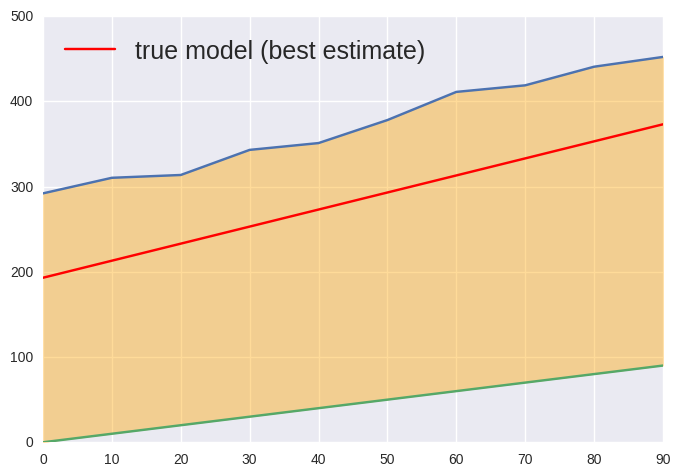

In [51]:
pyplt.plot(x, [v[1][0] for v in pointToBounds])
pyplt.plot(x, [v[1][1] for v in pointToBounds])
pyplt.plot(x, [avgYAtX[i] for i in x], color="red", label="true model (best estimate)")
pyplt.fill_between(x, [v[1][0] for v in pointToBounds], [v[1][1] for v in pointToBounds], color="orange", alpha=0.4)
pyplt.legend(loc=2, prop={'size':18})

### Feature selection
Proposed list of features to consider for influence upon intertweet time: -mention distance -time of day -contains mention -contains URL -length of tweet (num chars) -contains hashtags -is_replyWe now need to form the features described above. The most non-trivial one to create is "mention distance", as defined in lecture. We do this now.
#### Forming mention distance¶


In [52]:
import twitter_tools
from twitter_tools import *

Obtain your own data files here! 

In [53]:
tweetFile = open("new_gruber_tweets.json")

In [54]:
import json
jsonFile = json.load(tweetFile)

In [55]:
tweetFile.close()

In [56]:
gruberTweetsDF = pandas.io.json.read_json("new_gruber_tweets.json")
siracusaTweetsDF = pandas.io.json.read_json("new_siracusa_tweets.json")
armentTweetsDF = pandas.io.json.read_json("new_arment_tweets.json")

In [57]:
gruberTimeDiffs = []
gruberTweetTimes = []
gruberTimeToDiff = {}
gruberTimeToText = {}
siracusaMentionTimes = []
armentMentionTimes = []

In [58]:
gruberCreatedDF = gruberTweetsDF.ix[0:, ["created_at"]]
gruberCreatedTextDF = gruberTweetsDF.ix[0:, ["created_at", "text"]]
createdTextVals = gruberCreatedTextDF.values

for i, row in gruberCreatedDF.iterrows():
    gruberTweetTimes.append(row["created_at"])

In [59]:
gruberTweetTimes.sort()

In [60]:
for i in xrange(1, len(gruberTweetTimes)):
    timeDiff = (gruberTweetTimes[i]-gruberTweetTimes[i-1]).seconds
    gruberTimeDiffs.append(timeDiff)
    gruberTimeToDiff[gruberTweetTimes[i]] = timeDiff
    gruberTimeToText[gruberTweetTimes[i]] = gruberCreatedTextDF[ gruberCreatedTextDF["created_at"]==gruberTweetTimes[i] ]

##### Capture time of mentions

In [61]:
nearestMentionToTimeDiff = []
tweetIndexToNearestMention = {}

In [62]:
def findTweetFollowingTime(timeStamp, tweetTimes):
    returnTweetTime = None
    
    for t in tweetTimes:
        if t>timeStamp:
            returnTweetTime = t
            break
    
    return returnTweetTime

def findTweetPreceedingTime(timeStamp, tweetTimes):
    returnTweetTime = None
    
    i = len(tweetTimes)-1
    
    while i>=0:
        t = tweetTimes[i]
        if t<timeStamp:
            returnTweetTime = t
            break
        
        i-=1
    
    return returnTweetTime


In [63]:
siracusaTimeOfGruberMentions = []
armentTimeOfGruberMentions = []

In [64]:
for i, row in armentTweetsDF.iterrows():
    if "user_mentions" in row:
        if type(row["user_mentions"]) == list:
            if len([e for e in row["user_mentions"] if e["screen_name"]=="gruber"])>0:
                armentTimeOfGruberMentions.append(row["created_at"])

In [65]:
for i, row in siracusaTweetsDF.iterrows():
    if "user_mentions" in row:
        if type(row["user_mentions"]) == list:
            if len([e for e in row["user_mentions"] if e["screen_name"]=="gruber"])>0:
                siracusaTimeOfGruberMentions.append(row["created_at"])

##### Mention distance for each @gruber tweet
For each gruber tweet, let's find the tweet belonging to either @siracusa or @marcoarment which is the closest, in time, to mention @gruber 

In [66]:
gruberTweetTimes.sort()
siracusaTimeOfGruberMentions.sort()
armentTimeOfGruberMentions.sort()
for i in xrange(len(gruberTweetTimes)):
    t = gruberTweetTimes[i]
    t_next = None
    if i+1<len(gruberTweetTimes):
        t_next = gruberTweetTimes[i+1]
        
        #print "t_next: %s" % t_next
        t_s = findTweetFollowingTime(t, siracusaTimeOfGruberMentions)
        t_s_prev = findTweetPreceedingTime(t, siracusaTimeOfGruberMentions)
        
        #print "t_s: %s" % t_s
        
        t_a = findTweetFollowingTime(t, armentTimeOfGruberMentions)
        t_a_prev = findTweetPreceedingTime(t, armentTimeOfGruberMentions)
        
        sDiff = None
        aDiff = None
        if t_s_prev is not None and t_s is not None: 
            sDiff = math.fabs((t_s - t).seconds)
            if sDiff >math.fabs((t-t_s_prev).seconds):
                sDiff = math.fabs((t-t_s_prev).seconds)
            
        if t_a_prev is not None and t_a is not None:
            aDiff = math.fabs((t_a - t).seconds)
            if aDiff > math.fabs((t-t_a_prev).seconds):
                aDiff = math.fabs((t - t_a_prev).seconds)
        
        closestMention = None
        
        if sDiff is not None:
            closestMention = sDiff
        elif aDiff is not None:
            closestMention = aDiff
        
        if aDiff is not None and sDiff is not None:
            if aDiff < sDiff:
                closestMention = aDiff
                
        if closestMention is not None:
            nearestMentionToTimeDiff.append((closestMention, (t_next-t).seconds))
            tweetIndexToNearestMention[i] = closestMention


#### Extract remaining features

In [67]:
features_list = extract_features(jsonFile)

In [70]:
featuresWithLabel = []
for i in range(len(gruberTimeDiffs)):
    timeDiff = gruberTimeDiffs[i]
    if timeDiff<4000:
        label = "short"
    else:
        label = "long"
    
    featuresForTweet = features_list[i]
    
    nearestMention = 0
    if i in tweetIndexToNearestMention:
        nearestMention = tweetIndexToNearestMention[i]
    
    completeItem = []
    completeItem.append(label)
    completeItem.extend(list(featuresForTweet))
    completeItem.append(nearestMention)
    featuresWithLabel.append(completeItem)

#### Evaluate features by mutual information gain
Get info_gain library from your local path! 

In [71]:
from info_gain import *

#### 1 Time of day

In [72]:
valsY = ["short", "long"]
binsY = None

In [73]:
joint_list = [(v[1], v[0]) for v in featuresWithLabel]
valsX = ["morning", "afternoon", "evening", "night"]
binsX = None

In [74]:
jpTable = compute_joint_prob(joint_list, valsX, valsY, None, None)

In [75]:
entropy_loss(jpTable, valsX, valsY)

0.00029792328911204535

#### 2 Contains mention

In [76]:
joint_list = [(v[2], v[0]) for v in featuresWithLabel]
valsX = None
binsX = [[0, .9], [1.0, 100]]

In [77]:
jpTable = compute_joint_prob(joint_list, valsX, valsY, bins1=binsX)

In [78]:
entropy_loss(jpTable, [0.0, 1.0], valsY)

0.00018592171588510675

#### 3 Contains URL

In [79]:
joint_list = [(v[3], v[0]) for v in featuresWithLabel]
valsX = None
binsX = [[0, .9], [1.0, 100]]

In [80]:
jpTable = compute_joint_prob(joint_list, valsX, valsY, bins1=binsX)

In [81]:
entropy_loss(jpTable, [0.0, 1.0], valsY)

0.0006917841288795468

#### 4 Length of tweet

In [82]:
joint_list = [(v[4], v[0]) for v in featuresWithLabel]
valsX = None
binsX = [[0, 14], [14, 28], [28, 42], [42, 56], [56, 70], [70, 84], [84, 98], [98, 112], [112, 126]]

In [83]:
jpTable = compute_joint_prob(joint_list, valsX, valsY, bins1=binsX)

In [84]:
entropy_loss(jpTable, [v[4] for v in featuresWithLabel], valsY)

3.1844346574819027

#### 5 Contains hashtags

In [85]:
joint_list = [(v[5], v[0]) for v in featuresWithLabel]
valsX = None
binsX = [[0, .9], [1.0, 100]]

In [86]:
jpTable = compute_joint_prob(joint_list, valsX, valsY, bins1=binsX)

In [88]:
entropy_loss(jpTable, [0.0, 1.0], valsY)

2.471814972664077e-05

#### 6 Is reply

In [89]:
joint_list = [(v[6], v[0]) for v in featuresWithLabel]
valsX = None
binsX = [[0, .9], [1.0, 100]]

In [90]:
jpTable = compute_joint_prob(joint_list, valsX, valsY, bins1=binsX)

In [91]:
entropy_loss(jpTable, [0.0, 1.0], valsY)

7.188753133346992e-05

#### 7 Mention distance

In [93]:
joint_list = [(v[7], v[0]) for v in featuresWithLabel]
valsX = None
binsX = [[0, 1000], [1000, 5000], [5000, 8000], [8000, 10000], [10000, 20000], [20000, 30000], [30000, 60000], [60000, 80000], [80000, 10000], [100000, 800000]]

In [94]:
jpTable = compute_joint_prob(joint_list, valsX, valsY, bins1=binsX)

In [95]:
entropy_loss(jpTable, [0.0, 1.0], valsY)

2.065038542452612

#### Covariance betwen intertweet and mantion distance

In [158]:
mentionDists = [[v[0]] for v in nearestMentionToTimeDiff]
interTweetTimes = [[v[1]] for v in nearestMentionToTimeDiff]

In [159]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [160]:
clf = linear_model.LinearRegression()

In [161]:
clf.fit(mentionDists, interTweetTimes)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [162]:
clf.coef_

array([[ 0.01578781]])

The result above shows that relation between mentionDists and interTweetTimes is not linear and thus linear regression is not usefull for this case

### Fitting a model
Obtain data points - each point is of the form (delta-t, mention distance, text-length of last tweet) - label with time until next tweet
#### kNN
Form data points to be used with kNN model 

In [96]:
step_size = 10
knn_data_points = []
tweet_index = 0
for v in timeUntilNext:
    bin_left_edges = np.arange(0, v, step_size)
    
    features_for_tweet = features_list[tweet_index]
    
    if tweet_index in tweetIndexToNearestMention:
        for l_edge in bin_left_edges:
            newDeltaT = l_edge
            mentionDist = tweetIndexToNearestMention[tweet_index] + newDeltaT
            textLength = features_for_tweet[3]
            label = v-l_edge
            
            newPoint = [newDeltaT, mentionDist, textLength, label]
            knn_data_points.append(newPoint)
    
    tweet_index+=1

In [97]:
import sklearn
from sklearn.neighbors import KNeighborsRegressor

In [98]:
knn = KNeighborsRegressor(5)

In [100]:
knn_3 = KNeighborsRegressor(3)

In [101]:
len(knn_data_points)

1381258

In [102]:
.70*len(knn_data_points)

966880.6

In [103]:
.30*len(knn_data_points)

414377.39999999997

In [104]:
import random

In [105]:
trainingPoints = [random.choice(knn_data_points) for i in xrange(966880)]

trainingX = [(v[0], v[1], v[2]) for v in trainingPoints]

trainingY = [v[3] for v in trainingPoints]

m_3 = knn_3.fit(trainingX, trainingY)

m = knn.fit(trainingX, trainingY)

#### Performance on training set

In [106]:
y_ = m.predict(trainingX)

y = m_3.predict(trainingX)

train_diffs = []
for i in xrange(len(trainingY)):
    train_diffs.append(trainingY[i] - y_[i])

pandas.Series([math.fabs(x) for x in train_diffs]).describe()

count    966880.000000
mean       1874.235184
std        4711.921141
min           0.000000
25%           4.000000
50%           8.000000
75%        1064.000000
max       67504.400000
dtype: float64

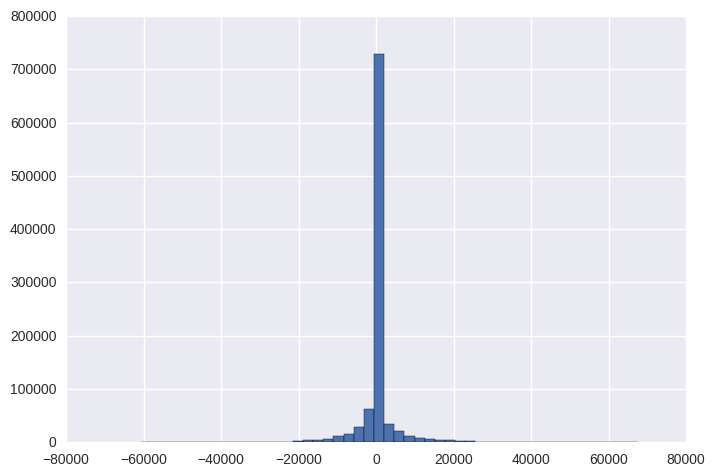

In [107]:
pandas.Series(train_diffs).hist(bins=50)

#### Performance on test set

In [108]:
testPoints = [random.choice(knn_data_points) for i in xrange(414377)]

testX = [(v[0], v[1], v[2]) for v in testPoints]

testY = [v[3] for v in testPoints]

test_pred = m_3.predict(testX)

test_diffs = []
for i in xrange(len(testY)):
    test_diffs.append(math.fabs(testY[i] - test_pred[i]))

pandas.Series(test_diffs).describe()

count    414377.000000
mean       1841.529116
std        5539.327011
min           0.000000
25%           3.333333
50%           6.666667
75%          30.000000
max       82424.666667
dtype: float64

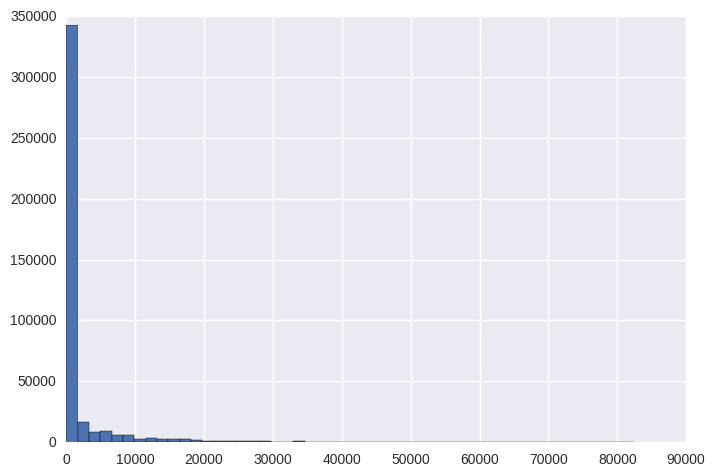

In [109]:
testSeries = pandas.Series(test_diffs)

testSeries.hist(bins=50)